In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import numpyro

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.baseline import Baseline

numpyro.set_platform('cpu')
numpyro.set_host_device_count(4)

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

#### Load data and preprocess

In [4]:
data = DataClass(config)
df, encoder_dict = data.build()

2023-03-09 16:11:46,390 - hb_mep.data_access.core - INFO - Reading data ....
2023-03-09 16:11:46,394 - hb_mep.data_access.core - INFO - Processing data ...
2023-03-09 16:11:46,434 - hb_mep.utils.utils - INFO - func:build took: 0.04 sec


#### Initialize model

In [5]:
model = Baseline(config)

#### Run MCMC inference

In [6]:
mcmc, posterior_samples = model.sample(df=df)

2023-03-09 16:11:46,863 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-03-09 16:11:46,864 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-09 16:11:46,864 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-09 16:11:46,866 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-03-09 16:11:46,866 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-03-09 16:11:46,917 - hb_mep.models.baseline - INFO - Running inference wit

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

2023-03-09 16:13:13,948 - hb_mep.utils.utils - INFO - func:sample took: 1 min and 27.09 sec


#### Diagnostics

In [7]:
mcmc.print_summary()


                                             mean       std    median      5.0%     95.0%     n_eff     r_hat
                                 a[0,0]      6.81      0.04      6.79      6.76      6.88   1261.31      1.00
                                 a[0,1]      1.94      0.06      1.95      1.84      2.02   1831.10      1.00
                                 a[0,2]      2.03      0.03      2.03      1.98      2.08   1274.89      1.00
                                 a[0,3]      2.22      0.04      2.22      2.17      2.29    492.87      1.02
                                 a[0,4]      3.02      0.02      3.02      2.99      3.05   4961.73      1.00
                         a_global_scale      1.38      0.97      1.17      0.04      2.76   1492.82      1.00
                        a_level_mean[0]      5.86      1.81      6.58      2.21      8.08   2919.53      1.00
                        a_level_mean[1]      1.94      0.84      1.93      0.40      3.01   8155.99      1.00
         

#### Plot fitted curves

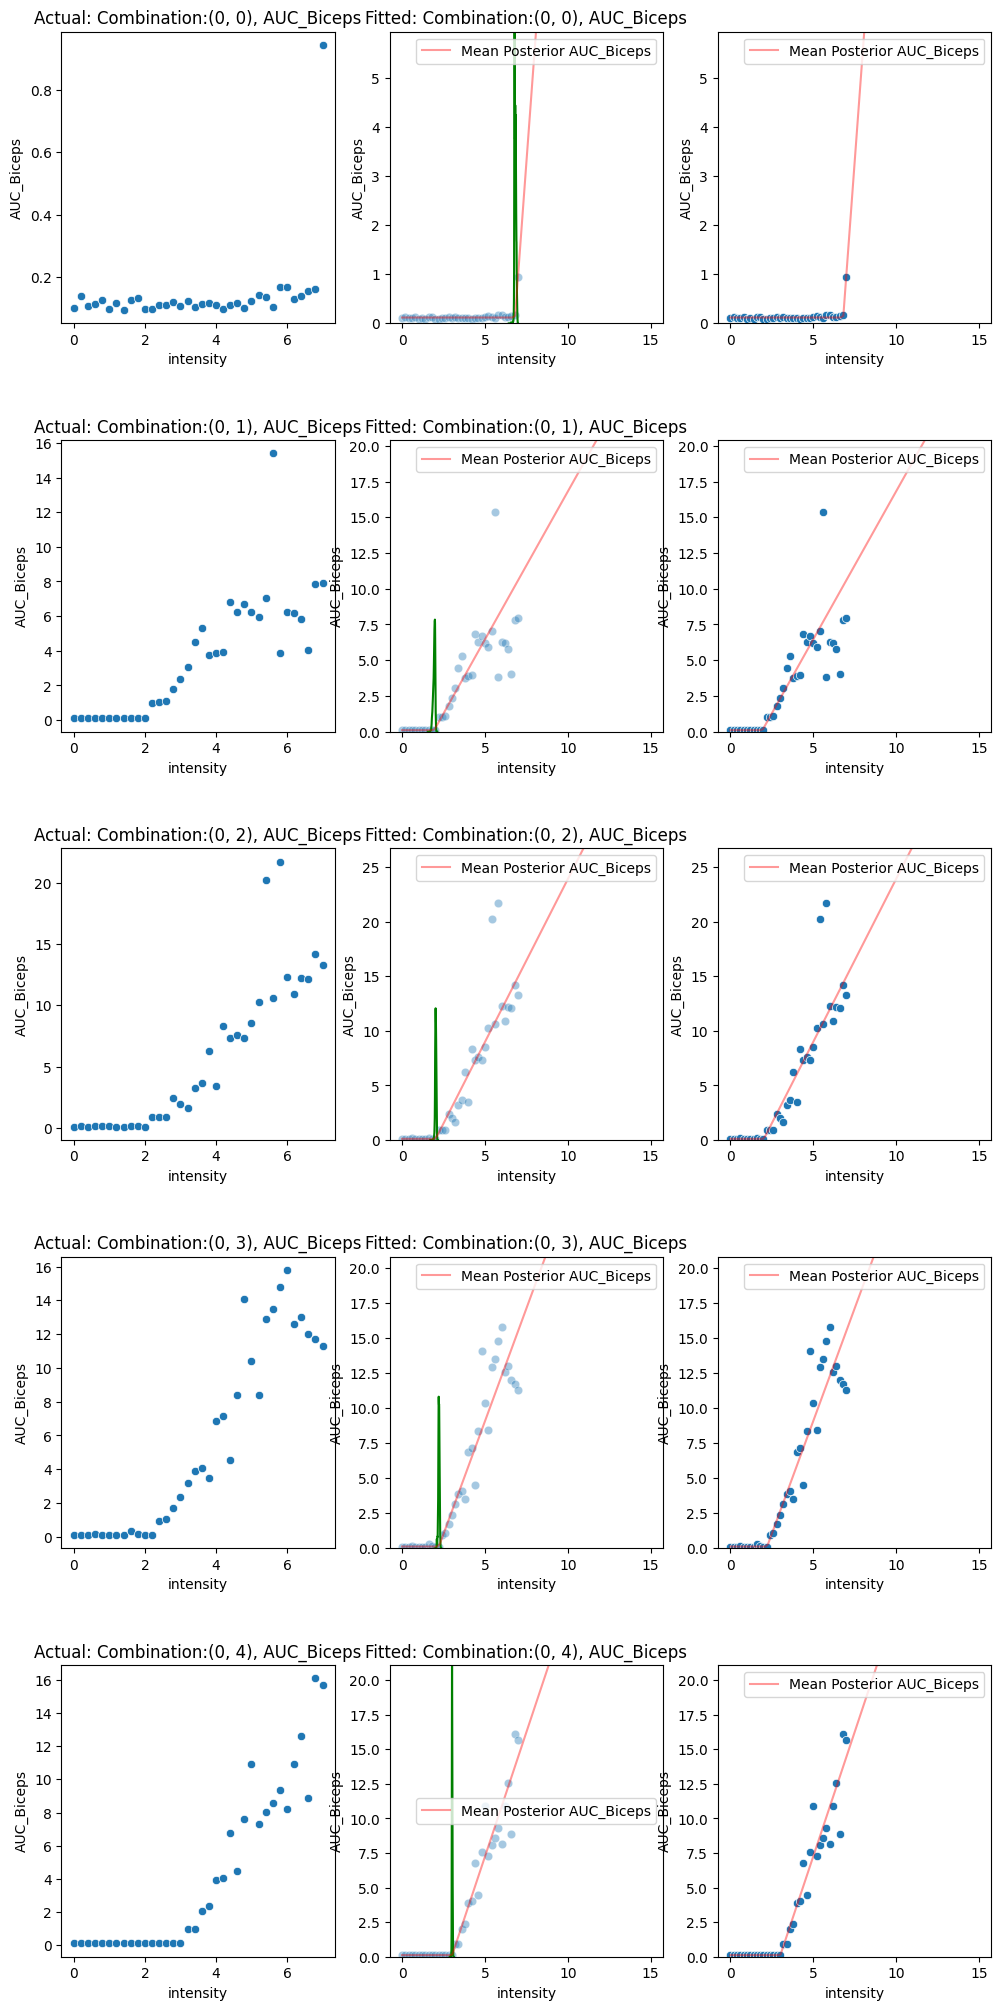

In [8]:
model.plot_fit(df=df, posterior_samples=posterior_samples);

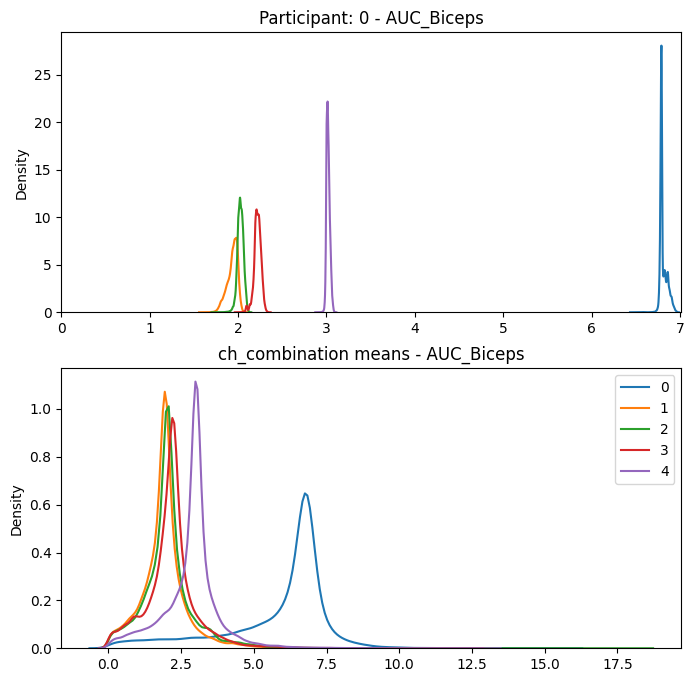

In [9]:
model.plot_kde(df=df, posterior_samples=posterior_samples);